In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import tools

SyntaxError: invalid syntax (wrist_cnn.py, line 11)

In [9]:
skeleton=np.load("../testskel.npy")
for coord in skeleton:
    coord[0] = coord[0] * 128/640
    coord[1] = coord[1] * 128/480
image = np.load("../testimg.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../testskel.npy'

In [ ]:
def joint_angle_from_joint_positions(joint1, joint2, joint3):
    dir12 = joint2 - joint1
    dir23 = joint3 - joint2
    
    angle_joint_2 = np.arccos(np.dot(dir12, dir23) / np.linalg.norm(dir12) * np.linalg.norm(dir23))
    return angle_joint_2

In [ ]:
def __draw2djoints_matplotlib(ax, annots, links, alpha=1):
    """
    Draw segments, one color per link
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L66
    """
    colors = ['r', 'm', 'b', 'c', 'g']

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            __draw2dseg_matplotlib(
                    ax,
                    annots,
                    finger_links[idx],
                    finger_links[idx + 1],
                    c=colors[finger_idx],
                    alpha=alpha)

In [ ]:
def __draw2dseg_matplotlib(ax, annot, idx1, idx2, c='r', alpha=1):
    """Draw segment of given color
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L81
    """
    ax.plot(
            [annot[idx1, 0], annot[idx2, 0]], [annot[idx1, 1], annot[idx2, 1]],
            c=c,
            alpha=alpha)

In [ ]:
def visualize_joints_2d(canvas, joints, joint_idxs=True, joint_names=None, links=None, alpha=1):
    """Draw 2d skeleton on matplotlib axis
    Based on https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L49
    """
    if links is None:
        links = [(0, 1, 6, 7, 8), (0, 2, 9, 10, 11), (0, 3, 12, 13, 14),
                 (0, 4, 15, 16, 17), (0, 5, 18, 19, 20)]

    if isinstance(canvas, matplotlib.axes.SubplotBase):
        ax = canvas
        # Scatter hand joints on image
        x = joints[:, 0]
        y = joints[:, 1]
        ax.scatter(x, y, 1, 'r')

        # Add idx labels to joints
        for row_idx, row in enumerate(joints):
            if joint_idxs:
                if joint_names:
                    plt.annotate(str(joint_names[row_idx]), (row[0], row[1]))
                else:
                    plt.annotate(str(row_idx), (row[0], row[1]))

        __draw2djoints_matplotlib(ax, joints, links, alpha=alpha)
        
    elif isinstance(canvas, np.ndarray):
        img = canvas
        
        for joint in joints:
            joint = joint.astype(np.int)
            img = cv2.circle(img, tuple(joint), 1, (255, 0, 0), 1)
        img = __draw2djoints_cv(img, joints, links, alpha=alpha)


In [ ]:
    
fig = plt.figure(figsize=(140, 100))
ax = fig.add_subplot(5, 5, 1)
ax.imshow(image)
print(isinstance(ax, matplotlib.axes.SubplotBase))
visualize_joints_2d(ax, skeleton, joint_names=tools.FHAD.get_joint_names())    

In [ ]:
def __draw2dseg_cv(img, joints, idx1, idx2, c='r', alpha=1):
    cmap = {
            'r': (255, 0, 0),
            'm': (255,0,255),
            'b': (0,0,240),
            'c': (0,255,255),
            'g': (0, 240, 0)
    }
    img = cv2.line(img, tuple(joints[idx1].astype(np.int)), tuple(joints[idx2].astype(np.int)), cmap[c])
    return img

In [ ]:
def __draw2djoints_cv(img, joints, links, alpha=1):
    """
    Draw segments, one color per link
    https://github.com/guiggh/hand_pose_action/blob/master/load_example.py#L66
    """
    colors = ['r', 'm', 'b', 'c', 'g']

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            img = __draw2dseg_cv(
                    img,
                    joints,
                    finger_links[idx],
                    finger_links[idx + 1],
                    c=colors[finger_idx],
                    alpha=alpha)
    return img

In [ ]:
print(type(skeleton))
if isinstance(skeleton, np.ndarray):
    print("whoa")
    

In [ ]:
window_name = "bullshit"
window = cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(image)
image2 = cv2.convertScaleAbs(image, alpha=255/maxVal)
image2 = cv2.applyColorMap(image2, cv2.COLORMAP_PARULA)
visualize_joints_2d(image2, skeleton, joint_names=tools.FHAD.get_joint_names() )
fig = plt.figure(figsize=(140, 100))
ax = fig.add_subplot(5, 5, 1)
ax.imshow(image2)




In [ ]:
import os
checkpoint_dir = r"E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\checkpoints"
__checkpoint_file_prefix = "pose_est_"
if os.path.exists(checkpoint_dir):
    cp_files = [os.path.abspath(os.path.join(checkpoint_dir, filename)) for filename in os.listdir(checkpoint_dir)]
    cp_files = [path for path in cp_files if os.path.isfile(path) and __checkpoint_file_prefix in os.path.basename(path)]

    if len(cp_files) > 0:
        files_sorted = sorted(cp_files, key=os.path.getctime, reverse=True)
        for file in files_sorted:
            print(file)
            print(os.path.getctime(file))

In [ ]:
from datetime import datetime
import shutil
import tools
__logger = tools.get_logger(__name__, do_file_logging=False)

tensorboard_dir = r"E:\Google Drive\UNI\Master\Thesis\src\data\pose_est\tensorboard_logs"
run_types = ["train", "validation", "test"]
for run_type in run_types:
    type_dir = os.path.join(tensorboard_dir, run_type)
    if os.path.exists(type_dir):
        log_files = sorted([os.path.join(type_dir, file) for file in os.listdir(type_dir) if os.path.isfile(os.path.join(type_dir, file))], key=os.path.getmtime)
        if len(log_files) > 0:
            time = datetime.fromtimestamp(os.path.getmtime(log_files[0])).strftime('%Y-%m-%d_%H-%M-%S')
            backupdir = os.path.join(type_dir, "old_runs", time)
            os.makedirs(backupdir)
            for file in log_files:
                shutil.move(file, backupdir)
                print("Moving log file {} to {}".format(file, backupdir))




7.9788456


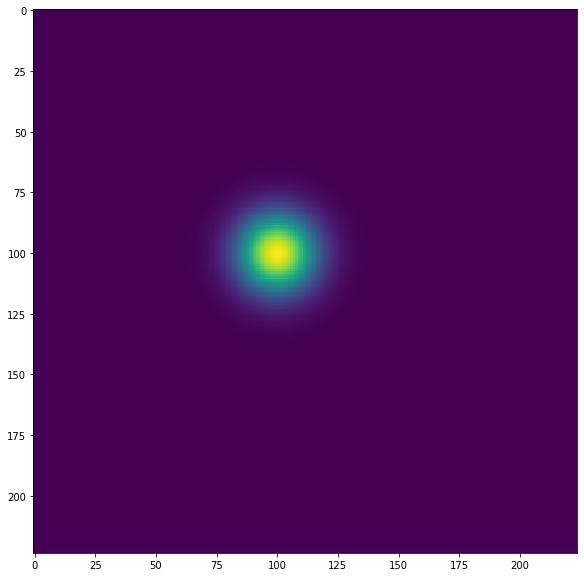

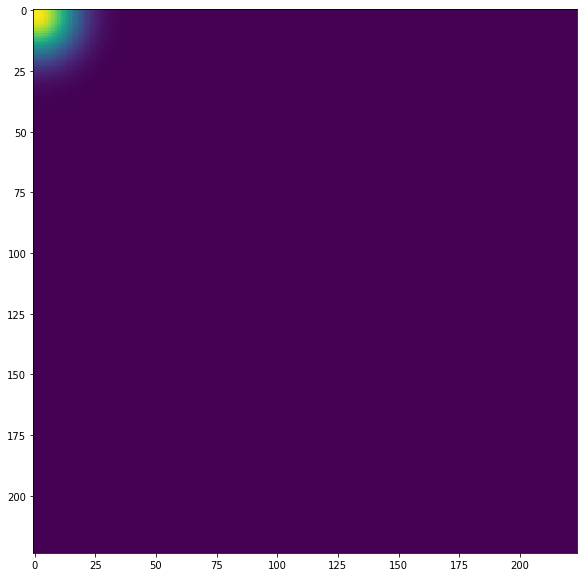

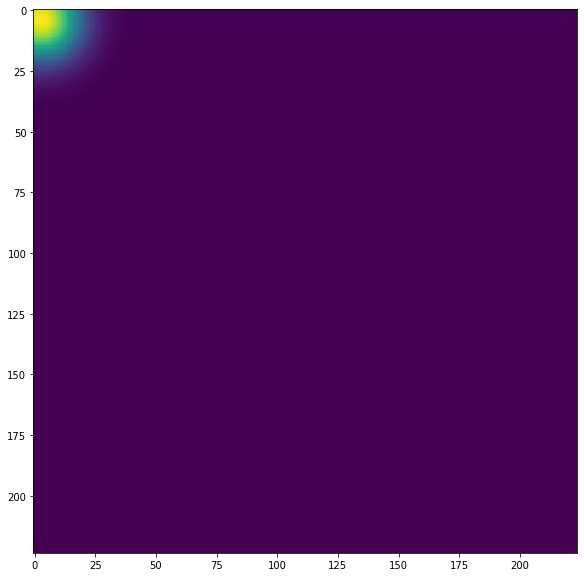

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def eukl_distance(distance_x, distance_y):
    return np.sqrt(np.square(distance_x) + np.square(distance_y))


def gaussian(x, mu, sig):
    value = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return value


pts = np.array([
        [100, 100],
        [1, 2],
        [3, 4]
], dtype = np.float32)
map_height, map_width = 224, 224
sigma = 0.05
normalize = True
conf_maps = np.zeros(shape=(pts.shape[0], map_height, map_width), dtype=np.float32)
for i, pt in enumerate(pts):
    x, y = pt
    for xv in range(map_width):
        for yv in range(map_height):

            distance = eukl_distance((x - xv) / map_width, (y - yv) / map_height)
            value = gaussian(distance, mu=0, sig=sigma)
            conf_maps[i, yv, xv] = value
if normalize:
    conf_maps = conf_maps / (sigma * np.sqrt(2 * np.pi))
    
for conf in conf_maps:
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(111)
    ax.imshow(conf)
print(conf_maps.max())

0.07978845608028655


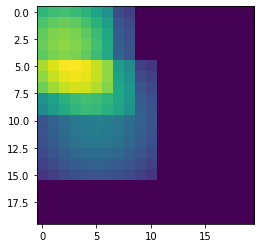

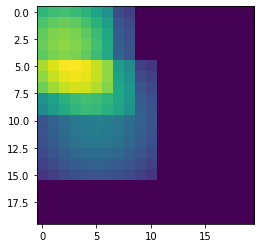

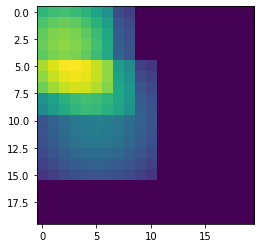

In [13]:
import tensorflow as tf
import tensorflow_probability as tfp

def gaussian_kernel(size: int, mean: float, std: float, ):
    d = tfp.distributions.Normal(mean, std)
    vals = d.prob(tf.range(start = -size, limit = size + 1, dtype = tf.dtypes.float32))
    gauss_kernel = tf.einsum('i,j->ij', vals, vals)
    return gauss_kernel / tf.reduce_sum(gauss_kernel)

conf_maps_2 = np.zeros(shape = [map_height, map_width, pts.shape[0]], dtype=np.float32)
conf_maps_2[pts[:, 1], pts[:, 0], :] = 1.0
gauss_kernel = gaussian_kernel(sigma, 0.0, 5.0)
gauss_kernel = gauss_kernel[:, :, tf.newaxis, tf.newaxis]
gauss_kernel = tf.keras.backend.repeat_elements(gauss_kernel, pts.shape[0], axis=3)
conf_maps_2 = tf.expand_dims(conf_maps_2, 0)
conf_maps_2 = tf.nn.conv2d(conf_maps_2, gauss_kernel, strides=[1,1,1,1], padding='SAME')
conf_maps_2 = tf.squeeze(conf_maps_2, axis=0)

if normalize:
    conf_maps_2 = conf_maps_2 / (sigma * np.sqrt(2 * np.pi))
    
for i in range(conf_maps_2.shape[2]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(conf_maps_2[:,:,i])
print(conf_maps.max())


0.03183099


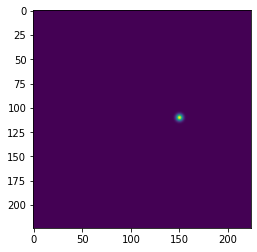

In [3]:
import numpy as np
import tensorflow as tf
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

map_height = 224
map_width = 224
pt = [110, 150]
sigma = 5
x,y = pt
conf_maps = np.zeros(
    shape = (1, int(map_height), int(map_width)),
    dtype = np.float32)
pos = np.dstack(np.mgrid[0:map_height:1, 0:map_width:1])
rv = multivariate_normal(mean = [x, y], cov = sigma)
conf_maps[0] = rv.pdf(pos)
for i in range(conf_maps.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(conf_maps[i,:,:])
print(conf_maps.max())

In [8]:
import numpy as np
import tensorflow as tf

mat = np.zeros(shape = (224, 224, 3), dtype = np.float32)
mat[10, 15, 0] = 1
mat[100, 150, 1] = 1
mat[200, 210, 2] = 1


mat = tf.convert_to_tensor(mat)

maxy = tf.argmax(tf.argmax(mat, 1), 0)
maxx = tf.argmax(tf.argmax(mat, 0), 0)
maxs = tf.stack([maxy, maxx], axis = 1)
print(maxx)
print(maxy)
print(maxs)
maxs = tf.cast(maxs, dtype = tf.dtypes.float32)
print(tf.norm(maxs, axis=1))

mat = tf.stack([mat, mat, mat], axis = 0)
maxy = tf.argmax(tf.argmax(mat, 2), 1)
maxx = tf.argmax(tf.argmax(mat, 1), 1)
maxs = tf.stack([maxy, maxx], axis = 2)
maxs = tf.cast(maxs, dtype = tf.dtypes.float32)
print(maxx)
print(maxy)
print(maxs)

mean = tf.reduce_mean(maxs, axis = 0)
print(mean)

tf.Tensor([ 15 150 210], shape=(3,), dtype=int64)
tf.Tensor([ 10 100 200], shape=(3,), dtype=int64)
tf.Tensor(
[[ 10  15]
 [100 150]
 [200 210]], shape=(3, 2), dtype=int64)
tf.Tensor([ 18.027756 180.27756  290.      ], shape=(3,), dtype=float32)
tf.Tensor(
[[ 15 150 210]
 [ 15 150 210]
 [ 15 150 210]], shape=(3, 3), dtype=int64)
tf.Tensor(
[[ 10 100 200]
 [ 10 100 200]
 [ 10 100 200]], shape=(3, 3), dtype=int64)
tf.Tensor(
[[[ 10.  15.]
  [100. 150.]
  [200. 210.]]

 [[ 10.  15.]
  [100. 150.]
  [200. 210.]]

 [[ 10.  15.]
  [100. 150.]
  [200. 210.]]], shape=(3, 3, 2), dtype=float32)
tf.Tensor(
[[ 10.  15.]
 [100. 150.]
 [200. 210.]], shape=(3, 2), dtype=float32)
